## Limpieza de los datos de *AirBnb*

En la [web](http://insideairbnb.com/get-the-data.html) tenemos 7 archivos diferentes sobre los establecimientos AirBnb en Madrid.  Estos archivos son:
* listings.csv.gz 
* calendar.csv.gz 
* reviews.csv.gz
* listings.csv
* reviews.csv
* neighbourhoods.csv
* neighbourhoods.geojson

Los que tienen la extensión .gz son datos sin agrupar que vienen en formato comprimido mientras que los que no la tienen son datos agregados.  Los dos últimos tienen la función de geolocalizar los apartamentos en el mapa.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
df_feb = pd.read_csv('Data/Lisboa/listings0.csv.gz',compression='gzip',low_memory=False)
df_ene = pd.read_csv('Data/Lisboa/listings1.csv.gz',compression='gzip',low_memory=False)
df_dic = pd.read_csv('Data/Lisboa/listings2.csv.gz',compression='gzip',low_memory=False)
df_nov = pd.read_csv('Data/Lisboa/listings3.csv.gz',compression='gzip',low_memory=False)
df_oct = pd.read_csv('Data/Lisboa/listings4.csv.gz',compression='gzip',low_memory=False)
df_sep = pd.read_csv('Data/Lisboa/listings5.csv.gz',compression='gzip',low_memory=False)
df_ago = pd.read_csv('Data/Lisboa/listings6.csv.gz',compression='gzip',low_memory=False)
df_jul = pd.read_csv('Data/Lisboa/listings7.csv.gz',compression='gzip',low_memory=False)
df_may = pd.read_csv('Data/Lisboa/listings8.csv.gz',compression='gzip',low_memory=False)
df_abr = pd.read_csv('Data/Lisboa/listings9.csv.gz',compression='gzip',low_memory=False)



In [3]:
files = [df_feb,df_ene,df_dic,df_nov,df_oct,df_sep,df_ago,df_jul,df_may,df_abr]

df_Lisboa = pd.concat(files,sort=True)

In [4]:
df_feb = pd.read_csv('Data/Madrid/listings0.csv.gz',compression='gzip',low_memory=False)
df_ene = pd.read_csv('Data/Madrid/listings1.csv.gz',compression='gzip',low_memory=False)
df_dic = pd.read_csv('Data/Madrid/listings2.csv.gz',compression='gzip',low_memory=False)
df_nov = pd.read_csv('Data/Madrid/listings3.csv.gz',compression='gzip',low_memory=False)
df_oct = pd.read_csv('Data/Madrid/listings4.csv.gz',compression='gzip',low_memory=False)
df_sep = pd.read_csv('Data/Madrid/listings5.csv.gz',compression='gzip',low_memory=False)
df_ago = pd.read_csv('Data/Madrid/listings6.csv.gz',compression='gzip',low_memory=False)
df_jul = pd.read_csv('Data/Madrid/listings7.csv.gz',compression='gzip',low_memory=False)
df_may = pd.read_csv('Data/Madrid/listings8.csv.gz',compression='gzip',low_memory=False)
df_abr = pd.read_csv('Data/Madrid/listings9.csv.gz',compression='gzip',low_memory=False)

In [5]:
files = [df_feb,df_ene,df_dic,df_nov,df_oct,df_sep,df_ago,df_jul,df_may,df_abr]

df_Madrid = pd.concat(files, sort=True)

In [6]:
#Todas las columnas están en minúsculas y no hay espacios
df_Madrid.head()

,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,...,space,square_feet,state,street,summary,thumbnail_url,transit,weekly_price,xl_picture_url,zipcode
0,"Full use of living room, kitchen (with dishwas...",2,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",30,83,53,83,1.0,Real Bed,1.0,...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,172.0,Comunidad de Madrid,"Madrid, Comunidad de Madrid, Spain","Atico en la calle Principe de Vergara, con bañ...",NaN,Excelent public transport and easy Access to m...,$350.00,NaN,28016
1,There is fibre optic internet connection for y...,1,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",0,0,0,0,1.0,Real Bed,1.0,...,I am living in a nice flat near the centre of ...,97.0,Madrid,"Madrid, Madrid, Spain",We have a quiet and sunny room with a good vie...,NaN,The flat is near the centre of Madrid (15 minu...,$98.00,NaN,28047
2,La disponibilidad de acceso al apartamento es ...,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",18,317,35,56,1.0,Real Bed,2.0,...,"Select the Madrid more ""cool"" : 70 m, 2 bedroo...",NaN,Comunidad de Madrid,"Madrid, Comunidad de Madrid, Spain",Apartamento céntrico junto a Gran Vía (VT-296)...,NaN,La situación del apartamento hace accesibles a...,$600.00,NaN,28004
3,NaN,2,"{Internet,Wifi,""Wheelchair accessible"",Doorman...",29,364,59,89,1.0,Real Bed,1.0,...,Room for two person with dressing room and bat...,NaN,Comunidad de Madrid,"Madrid, Comunidad de Madrid, Spain",NaN,NaN,NaN,NaN,NaN,28045
4,– Smoking is prohibited in rooms and public ar...,1,"{Wifi,""Wheelchair accessible"",Doorman,Elevator...",2,329,31,61,1.0,Real Bed,1.0,...,Nice and cozy roon for one person with a priva...,NaN,Comunidad de Madrid,"Madrid, Comunidad de Madrid, Spain",Nice and cozy roon for one person with a priva...,NaN,Muy bien comunicado con dos Metros a cinco min...,NaN,NaN,28045


In [7]:
#Cambiamos todos los campos sin formatear de ambas ciudades por su nombre
df_Madrid.city = "Madrid"
df_Lisboa.city = "Lisboa"

In [8]:
df_Madrid.city.value_counts()

Madrid    176705
Name: city, dtype: int64

In [9]:
df_Lisboa.city.value_counts()

Lisboa    220101
Name: city, dtype: int64

In [10]:
df = pd.concat([df_Lisboa,df_Madrid],sort=True)

In [11]:
#vemos la estructura de los datos 
df.shape

(396806, 106)

El **primer criterio** utilizado para simplificar la información contenida en la tabla es el de encontrar aquellas columnas prescindibles.

In [12]:
#Comprobamos chequeando la URL que significa cada columna y eliminamos las que son solo de consulta, 

a_borrar_consulta = ['listing_url','host_url']

#campos de texto sin relevancia, variables redundantes o URL`s que no nos sirven para el análisis. 
#Normalmente los campos de texto no vienen predeterminados por AirBnb y por tanto no tienen formato establecido.

a_borrar_texto = ['summary','space','neighborhood_overview','notes'
                     ,'transit','access','interaction','house_rules','host_name']
a_borrar_redundantes = ['scrape_id','calendar_last_scraped','jurisdiction_names','country'
                        ,'country_code','street','market','smart_location','host_location','zipcode','state'
                       ,'neighbourhood']
a_borrar_urls = ['thumbnail_url','picture_url','medium_url','xl_picture_url','host_thumbnail_url',
                 'host_picture_url','host_url','listing_url']

#Las siguientes columnas son eliminadas por el desconocimiento del método de cálculo o por no comprender que significan

a_borrar_desconocidas = ['is_location_exact','maximum_maximum_nights','maximum_minimum_nights','minimum_minimum_nights'
                        ,'minimum_maximum_nights','is_business_travel_ready',
                         'host_verifications','host_identity_verified']
#Las siguientes hacen referencia al método de scrapping o están condicionadas por el momento concreto en el que se hizo

a_borrar_scrapping = ['maximum_nights','minimum_nights','calendar_updated','has_availability']

#Por último, estos requerimientos no son necesarios:

a_borrar_irrelevantes = ['require_guest_profile_picture','require_guest_phone_verification','experiences_offered'
                         ,'host_has_profile_pic']

In [13]:
#Juntamos todas las columnas, las eliminamos y comprobamos cuánto se han reducido
Useless = a_borrar_texto+a_borrar_redundantes+a_borrar_urls+a_borrar_desconocidas+a_borrar_scrapping+a_borrar_irrelevantes
df.drop(Useless,axis=1,inplace=True)
df.shape


(396806, 61)

El **segundo criterio** para reducir las dimensiones es eliminar aquellas columnas que contengan al menos un 30% 
de nulos, ya que no serán útiles con tanta información perdida.


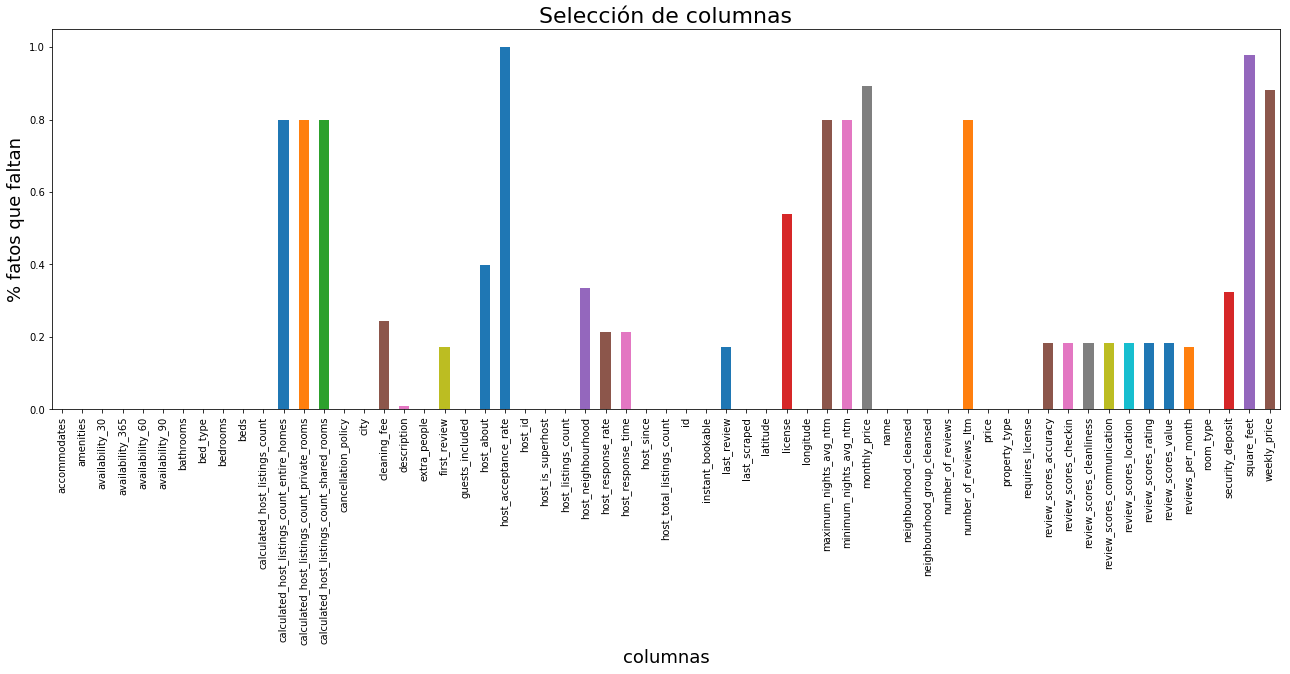

In [14]:
#Representamos gráficamente el % de nulos de las columnas restantes
missing = df.isnull().sum()/df.shape[0]
ax = missing.plot(kind='bar',figsize=(22,7))
ax.set_xlabel('columnas',fontsize=18)
ax.set_ylabel('% fatos que faltan',fontsize=18)
ax.set_title('Selección de columnas',fontsize=22)
plt.show()


In [15]:
nulos = missing.loc[missing > 0.3].index
nulos_lista = list(nulos)
#Dejamos las siguientes columnas aunque tengan muchos nulos ya que pueden ser importantes para los periodos que están disponibles
nulos_lista.remove('license')
nulos_lista.remove('maximum_nights_avg_ntm')
nulos_lista.remove('minimum_nights_avg_ntm')
nulos_lista.remove('number_of_reviews_ltm')
nulos_lista.remove('host_neighbourhood')
nulos_lista

['calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'host_about',
 'host_acceptance_rate',
 'monthly_price',
 'security_deposit',
 'square_feet',
 'weekly_price']

In [16]:
#Tenemos 62 columnas para realizar el análisis, pudiendo ser reducidas en el futuro en caso de ser considerado.
df.drop(nulos_lista, axis = 1, inplace = True)
df.shape

(396806, 52)

In [17]:
#Comprobamos las columnas restantes
df.columns

Index(['accommodates', 'amenities', 'availability_30', 'availability_365',
       'availability_60', 'availability_90', 'bathrooms', 'bed_type',
       'bedrooms', 'beds', 'calculated_host_listings_count',
       'cancellation_policy', 'city', 'cleaning_fee', 'description',
       'extra_people', 'first_review', 'guests_included', 'host_id',
       'host_is_superhost', 'host_listings_count', 'host_neighbourhood',
       'host_response_rate', 'host_response_time', 'host_since',
       'host_total_listings_count', 'id', 'instant_bookable', 'last_review',
       'last_scraped', 'latitude', 'license', 'longitude',
       'maximum_nights_avg_ntm', 'minimum_nights_avg_ntm', 'name',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'number_of_reviews', 'number_of_reviews_ltm', 'price', 'property_type',
       'requires_license', 'review_scores_accuracy', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_loca

In [18]:
#Pasamos las fechas de formato texto a fecha
df.last_scraped = pd.to_datetime(df.last_scraped)
df.host_since = pd.to_datetime(df.host_since)
df.first_review = pd.to_datetime(df.first_review)
df.last_review = pd.to_datetime(df.last_review)
df.last_scraped.dtype

dtype('<M8[ns]')

In [19]:
#Reemplazamos valores [t,f] por [True, False]

df.host_is_superhost = df.host_is_superhost.str.replace("f","0")
df.host_is_superhost = df.host_is_superhost.str.replace("t","1")




In [20]:
df.requires_license = df.requires_license.str.replace("f","0")
df.requires_license = df.requires_license.str.replace("t","1")

In [21]:
df.instant_bookable = df.instant_bookable.str.replace("f","0")
df.instant_bookable = df.instant_bookable.str.replace("t","1")

In [22]:
df.host_is_superhost = df.host_is_superhost.astype(bool)
df.requires_license = df.requires_license.astype(bool)
df.instant_bookable = df.instant_bookable.astype(bool)

In [23]:
#Comprobamos que está en booleano
df.requires_license.dtype

dtype('bool')

### Las políticas de cancelación del AirBnb son las siguientes:

* Flexible: Si la cancelación se hace con al menos 24h de antelación el huésped tiene derecho a una devolución completa.  Si es con menos de 24h la primera noche no será reembolsada, siendo el resto de los días reembolsados.

* Moderate: La cancelación se debe hacer o bien 48h después de la reserva o 5 días antes de la llegada para obtener reembolso completo.  Si se cancela con menos de 5 días de antelación se reembolsará el *50%* de las noches sin contar la primera.

* Strict_14_with_grace_period: La cancelación se debe hacer o bien 48h después de la reserva o *14* días antes de la llegada para obtener reembolso completo.  Para obtener el 50% del reembolso se debe cancelar con al menos 7 dias completos antes del día y hora local.  Con menos de 7 dias no hay reembolso.

* Super_strict_30: Si la cancelación se produce con al menos 30 días se reembolsa el 50%.

* Super_strict_60: Si la cancelación se produce con al menos 60 días se reembolsa el 50%.

* Long_term: Se aplica a huéspedes que están 28 días o más. El primer mes lo cobra el host sea cual sea la cancelación.

In [24]:
#Comprobamos que strict_14_with_grace_period y strict se refiere a lo mismo 
df.cancellation_policy.value_counts()

strict_14_with_grace_period    151624
moderate                       127271
flexible                       101096
strict                          13716
super_strict_30                  2064
super_strict_60                  1034
flexible_new                        1
Name: cancellation_policy, dtype: int64

In [25]:
#Eliminamos un valor raro cuya política no aparece en AirBnb
df = df[df.cancellation_policy != "flexible_new"]

In [26]:
#Por tanto igualamos los nombres al formato que tiene AirBnb en su web
df.cancellation_policy = df.cancellation_policy.str.replace("strict_14_with_grace_period","strict")
df.cancellation_policy.value_counts()

strict             165340
moderate           127271
flexible           101096
super_strict_30      2064
super_strict_60      1034
Name: cancellation_policy, dtype: int64

In [27]:
#La columna room type también es categórica 
df.room_type.value_counts()

Entire home/apt    275443
Private room       115589
Shared room          5773
Name: room_type, dtype: int64

In [28]:
#Pasamos a categórica con cinco y tres niveles respectivamente
df.cancellation_policy = pd.Categorical(df.cancellation_policy, ['flexible','moderate'
                                                                         ,'strict',
                                                                        'super_strict_30',
                                                                         'super_strict_60'],ordered=True)

df.room_type = pd.Categorical(df.room_type, ['Entire home/apt','Private room','Shared room'],ordered=True)


In [29]:
#Comprobamos las columnas restantes
df.columns

Index(['accommodates', 'amenities', 'availability_30', 'availability_365',
       'availability_60', 'availability_90', 'bathrooms', 'bed_type',
       'bedrooms', 'beds', 'calculated_host_listings_count',
       'cancellation_policy', 'city', 'cleaning_fee', 'description',
       'extra_people', 'first_review', 'guests_included', 'host_id',
       'host_is_superhost', 'host_listings_count', 'host_neighbourhood',
       'host_response_rate', 'host_response_time', 'host_since',
       'host_total_listings_count', 'id', 'instant_bookable', 'last_review',
       'last_scraped', 'latitude', 'license', 'longitude',
       'maximum_nights_avg_ntm', 'minimum_nights_avg_ntm', 'name',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'number_of_reviews', 'number_of_reviews_ltm', 'price', 'property_type',
       'requires_license', 'review_scores_accuracy', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_loca

In [30]:
df.to_csv("AirBnb_Madrid_Lisboa.csv",sep=",")